# 04GenderCOVID19-V6

# Libraries

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
from IPython.display import display

from scipy import stats

# Loading Data

In [2]:
gender = pd.read_csv(
    "C:\py\Projects\TuringCollege\COVID19\DataSets\gender.csv",
    index_col=False,
    skipinitialspace=True,
)

# Size

In [3]:
gender.shape

(242, 5)

# Missing Data

In [4]:
gender.isna().sum()

date         0
time         0
sex          0
confirmed    0
deceased     0
dtype: int64

# Delete Unneeded Columns

In [5]:
gender = gender.drop(["time"], axis=1)

## Rename Columns

In [6]:
gender.rename(
    columns={
        "date": "Date",
        "sex": "Gender",
        "confirmed": "Confirmed",
        "deceased": "Deceased",
    },
    inplace=True,
)

## Rename Column Values

In [7]:
gender.replace('male', 'Male', inplace = True)
gender.replace('female', 'Female', inplace = True)

# Dataset

In [8]:
gender.head()

,Date,Gender,Confirmed,Deceased
0,3/2/2020,Male,1591,13
1,3/2/2020,Female,2621,9
2,3/3/2020,Male,1810,16
3,3/3/2020,Female,3002,12
4,3/4/2020,Male,1996,20


In [9]:
pd.set_option("max_rows", None)
pd.set_option("max_columns", None)

# Females

In [10]:
females = gender.loc[(gender['Gender'] == 'Female')]

In [11]:
females_copy = females.copy()
females = females_copy

In [12]:
females["Confirmed Count"] = females["Confirmed"].diff().fillna(0)

In [13]:
females["Deceased Count"] = females["Deceased"].diff().fillna(0)

In [14]:
females["Confirmed Count"].mean()

38.710743801652896

In [15]:
females["Deceased Count"].mean()

1.0082644628099173

In [16]:
females.head()

,Date,Gender,Confirmed,Deceased,Confirmed Count,Deceased Count
1,3/2/2020,Female,2621,9,0.0,0.0
3,3/3/2020,Female,3002,12,381.0,3.0
5,3/4/2020,Female,3332,12,330.0,0.0
7,3/5/2020,Female,3617,14,285.0,2.0
9,3/6/2020,Female,3939,17,322.0,3.0


# Males

In [17]:
males = gender.loc[(gender['Gender'] == 'Male')]

In [18]:
males_copy = males.copy()
males = males_copy

In [19]:
males["Confirmed Count"] = males["Confirmed"].diff().fillna(0)

In [20]:
males["Deceased Count"] = males["Deceased"].diff().fillna(0)

In [21]:
males["Confirmed Count"].mean()

32.264462809917354

In [22]:
males["Deceased Count"].mean()

1.140495867768595

# Confirmed Statistical Significance Test

In [23]:
male_confirmed_list = males['Confirmed Count'].tolist()

In [24]:
female_confirmed_list = females['Confirmed Count'].tolist()

In [25]:
stats.mannwhitneyu(male_confirmed_list, female_confirmed_list)

MannwhitneyuResult(statistic=7720.5, pvalue=0.4629887556322855)

In [26]:
stats.shapiro(male_confirmed_list)

ShapiroResult(statistic=0.6272829174995422, pvalue=4.511649525145106e-16)

In [27]:
stats.shapiro(female_confirmed_list)

ShapiroResult(statistic=0.5124973058700562, pvalue=2.7806304948235566e-18)

In [28]:
stats.ttest_ind(male_confirmed_list,female_confirmed_list)

Ttest_indResult(statistic=-0.910544782570867, pvalue=0.36344885780543035)

# Deceased Statistical Significance Test

In [32]:
stats.mannwhitneyu(males['Deceased Count'], females['Deceased Count'])

MannwhitneyuResult(statistic=7960.5, pvalue=0.20975020919759269)

In [33]:
stats.shapiro(male_deceased_list)

ShapiroResult(statistic=0.7947064638137817, pvalue=1.0227648589156146e-11)

In [56]:
stats.shapiro(female_deceased_list)

ShapiroResult(statistic=0.7269214987754822, pvalue=1.0501639840935009e-13)

In [57]:
stats.ttest_ind(male_deceased_list,female_deceased_list)

Ttest_indResult(statistic=0.7337185517759817, pvalue=0.46383642540435965)

# Function

In [58]:
def test_sig(x, y):
    if stats.shapiro(x).pvalue >= 0.05 and stats.shapiro(y).pvalue >= 0.05: #if they are normally distriuted
        print("t-test")
        return stats.ttest_ind(x,y)
    else:
        print("mann-whitney")
        return stats.mannwhitneyu(x, y)

In [59]:
test_sig(male_deceased_list, female_deceased_list)

mann-whitney


MannwhitneyuResult(statistic=7960.5, pvalue=0.20975020919759269)

In [60]:
test_sig(male_confirmed_list, female_confirmed_list)

mann-whitney


MannwhitneyuResult(statistic=7720.5, pvalue=0.4629887556322855)

# Function 2

In [61]:
def test_sig(x, y):
    if stats.shapiro(x).pvalue >= 0.05 and stats.shapiro(y).pvalue >= 0.05: #if they are normally distriuted
        print("t-test")
        return stats.ttest_ind(x,y,equal_var = False) # assume samples have equal variance
    else:
        print("mann-whitney")
        return stats.mannwhitneyu(x, y)

In [62]:
test_sig(male_deceased_list, female_deceased_list)

mann-whitney


MannwhitneyuResult(statistic=7960.5, pvalue=0.20975020919759269)

# Confirmed Swarm Plot

In [63]:
concat_gender = pd.concat(
    [males, females],
    axis=1,
    keys=["males", "females"],
).stack(0)
concat_gender = concat_gender.reset_index(level=1)
concat_gender

,level_1,Confirmed,Confirmed Count,Date,Deceased,Deceased Count,Gender
0,males,1591.0,0.0,3/2/2020,13.0,0.0,Male
1,females,2621.0,0.0,3/2/2020,9.0,0.0,Female
2,males,1810.0,219.0,3/3/2020,16.0,3.0,Male
3,females,3002.0,381.0,3/3/2020,12.0,3.0,Female
4,males,1996.0,186.0,3/4/2020,20.0,4.0,Male
5,females,3332.0,330.0,3/4/2020,12.0,0.0,Female
6,males,2149.0,153.0,3/5/2020,21.0,1.0,Male
7,females,3617.0,285.0,3/5/2020,14.0,2.0,Female
8,males,2345.0,196.0,3/6/2020,25.0,4.0,Male
9,females,3939.0,322.0,3/6/2020,17.0,3.0,Female


c:\users\kevin nourian\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\kevin nourian\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


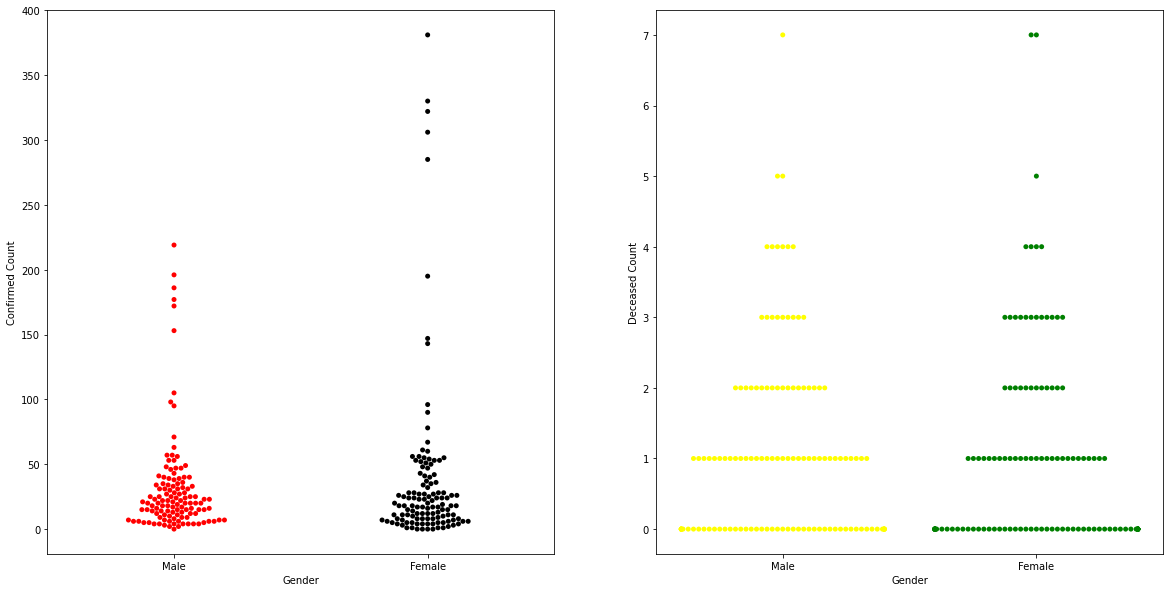

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

ax1 = sns.swarmplot(ax=axes[0], x='Gender', y='Confirmed Count', data=concat_gender, palette = ['red', 'black'])
ax2 = sns.swarmplot(ax=axes[1], x='Gender', y='Deceased Count', data=concat_gender, palette = ['yellow', 'green'])

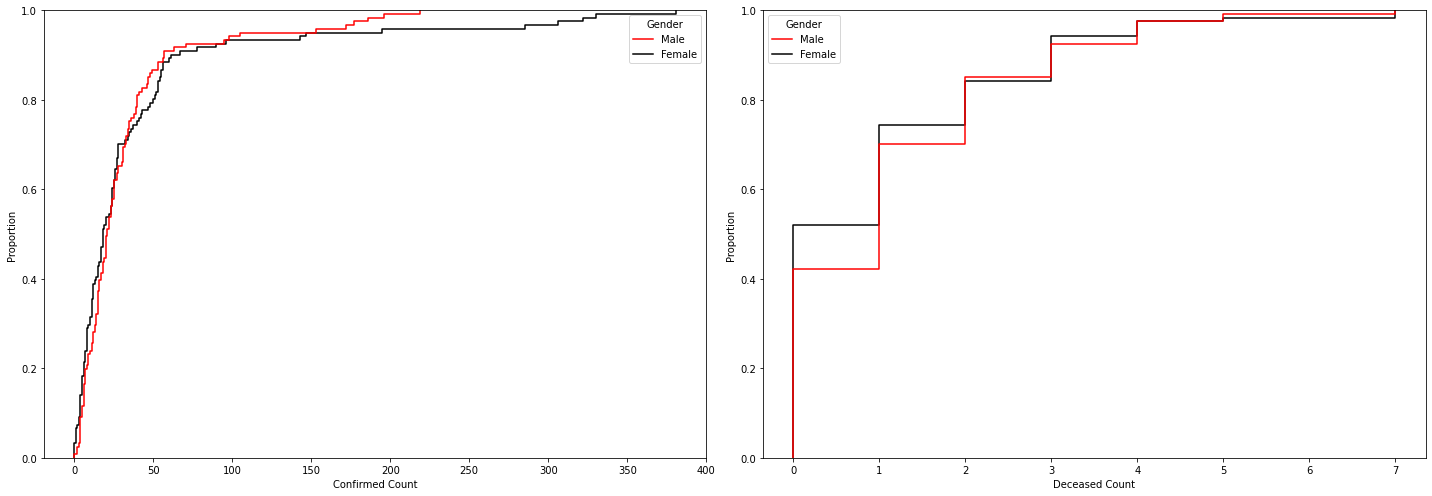

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7))
palette = ['red', 'black']

ax1 = sns.ecdfplot(
    ax=axes[0], data=concat_gender, x="Confirmed Count", hue="Gender", palette=palette
)

# ax1.set_xlabel("Infections")
# ax1.set_ylabel("Proportion")
# ax1.set_title("COVID-19 Infections in Men and Women")


ax2 = sns.ecdfplot(ax=axes[1], data=concat_gender, x="Deceased Count", hue="Gender", palette=palette)

# ax2.set_xlabel("Deaths")
# ax2.set_ylabel("")
# ax2.set_title("Deaths from COVID-19 in Men and Women")

plt.tight_layout()

plt.show()

(array([51., 34., 18.,  0.,  9.,  6.,  0.,  2.,  0.,  1.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

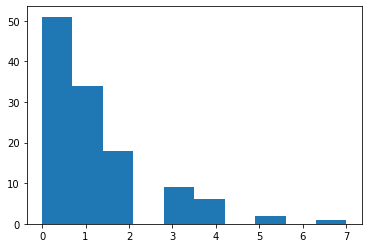

In [70]:
plt.hist(males["Deceased Count"])